In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast
import random
import os
os.makedirs("images", exist_ok=True)
from datetime import datetime, timedelta

restaurants = ['Pizza Hut', 'Dominos', 'Mehfil', 'Paradise Biryani', 'Behrouz', 'KFC', 'Subway']
cuisines = ['Indian', 'Chinese', 'Italian', 'Mexican', 'American']
ratings = [3, 4, 5]

data = []

for i in range(500):
    order_date = datetime(2022, 1, 1) + timedelta(days=random.randint(0, 180))
    order_time = datetime.strptime(f"{random.randint(10, 23)}:{random.randint(0,59)}", "%H:%M").time()
    delivery_time = random.randint(15, 60)
    
    data.append({
        'order_id': i + 1,
        'user_id': random.randint(1000, 1100),
        'restaurant': random.choice(restaurants),
        'cuisine': random.choice(cuisines),
        'order_date': order_date.date(),
        'order_time': order_time,
        'delivery_time_mins': delivery_time,
        'rating': random.choice(ratings),
        'order_amount': round(random.uniform(100, 600), 2)
    })

df = pd.DataFrame(data)
df.to_csv('swiggy_data.csv', index=False)

In [2]:
df = pd.read_csv("Swiggy_dataset.csv")
df.head()

,type,id,name,uuid,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,address,locality,unserviceable,veg,City
0,F,37933,Faasos - Wraps & Rolls,6fe9caf1-02a7-4e66-83bb-1b4ff296b683,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,SHOP NO 2 HOTEL SHAHI PALACE VASTRAPUR LAKE AH...,HOTEL SHAHI PALACE,False,False,NaN
1,F,81814,Burger King,10083576-d32d-4a0e-8a82-3236ef342a19,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,SHOP # 5 GR FLR THIRD EYE 2PANCHAVATI CIRCLE O...,3rd Eye II Ellis Bridge CG Road,False,False,NaN
2,F,107046,Mahalaxmi Pav Bhaji,fbfe3bfa-03fd-4708-b913-06e2c9ee9639,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,GF 9/10 Dev complexnear parimal charasta opp. ...,C G Road,False,True,NaN
3,F,328315,HIIT Meals,81ab4019-2445-4aef-aff2-04beccd641d9,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,C11 Rajyash Rise Near Vishala Restaurant Vasna...,Vasna,False,False,NaN
4,F,108879,Jay Jalaram Parotha House,994e73e1-7c7c-4ad9-87e7-ecfecd4e36fa,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Capital Commercial Centre Near UCO Bank Ashram...,Ashram Road,False,True,NaN


In [3]:
df = pd.read_csv("Swiggy_dataset.csv")

# Basic cleanup
df['avgRating'] = pd.to_numeric(df['avgRating'], errors='coerce')
df['deliveryTime'] = pd.to_numeric(df['deliveryTime'], errors='coerce')
df['costForTwo'] = df['costForTwoStrings'].str.extract(r'₹(\d+)').astype(float)
df['totalRatings'] = df['totalRatingsString'].str.extract(r'(\d+)').astype(float)

In [5]:
# Explode cuisines column for groupby
df_exploded = df.copy()
df_exploded['cuisines'] = df_exploded['cuisines'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
df_exploded = df_exploded.explode('cuisines')

# Top cuisine in each area
cuisine_area = df_exploded.groupby(['area', 'cuisines']).size().reset_index(name='count')
top_cuisine_by_area = cuisine_area.sort_values(['area', 'count'], ascending=[True, False]).drop_duplicates('area')

top_cuisine_by_area.head(10)

,area,cuisines,count
0,Akhbar Nagar Circle,GujaratiFast Food,1
1,Begumpet,Chinese,1
2,26,BiryaniKeralaSouth IndianThalis,1
3,3rd Block Jayanagar,Fast FoodChaatSnacksPizzasNorth IndianIndian,1
4,A Unit of M/S Cohort Ruby Area,AsianIndianTandoorTibetanChinese,1
5,A.S. Rao Nagar & Sainikpuri,IndianSouth Indian,1
15,Abids,Ice Cream,3
28,Abids & Koti,DessertsIce CreamHealthy Food,1
32,Acher,North IndianChinesePunjabiCombo,1
54,Adajan,Fast Food,9


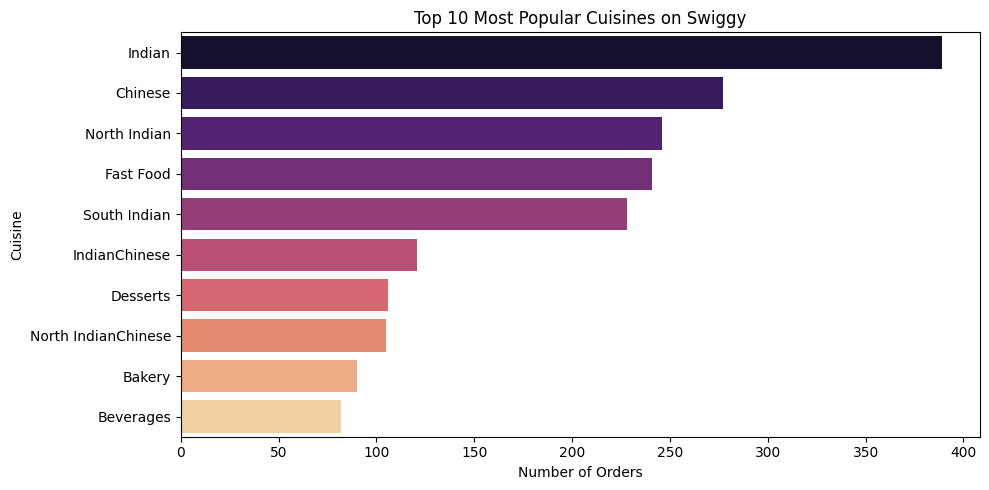

In [4]:
from collections import Counter
import ast

# Convert cuisines from string list to Python list
cuisine_counter = Counter()

for i in df['cuisines'].dropna():
    try:
        cuisines = ast.literal_eval(i)
        cuisine_counter.update(cuisines)
    except:
        continue

top_cuisines = cuisine_counter.most_common(10)
cuisine_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=cuisine_df, x='Count', y='Cuisine', hue='Cuisine', dodge=False, palette='magma', legend=False)
plt.title("Top 10 Most Popular Cuisines on Swiggy")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("images/top_cuisines.png", bbox_inches='tight')
plt.show()

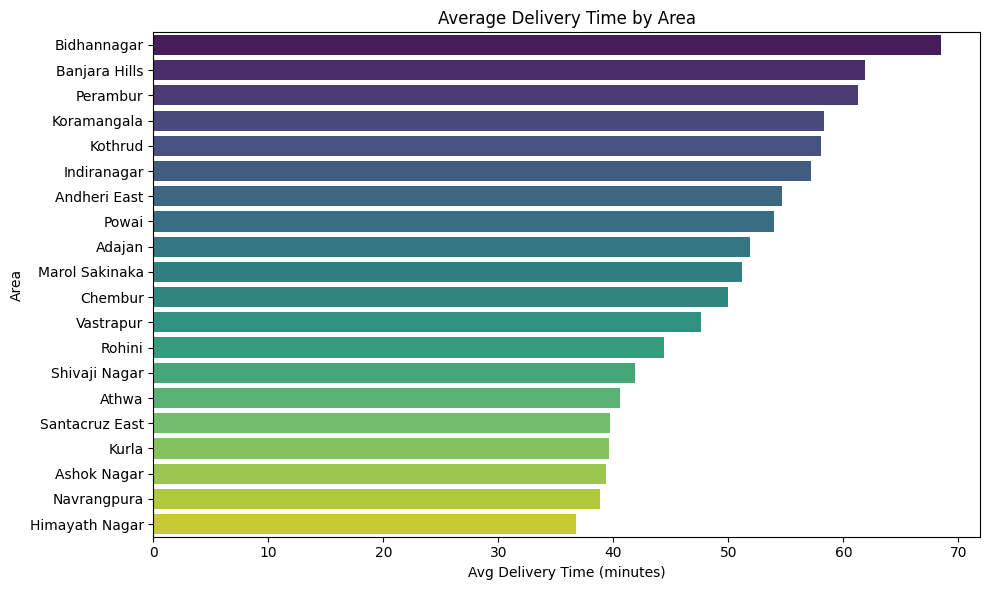

In [15]:
# Filter to top 20 areas by count
top_areas = df['area'].value_counts().head(20).index
df_filtered = df[df['area'].isin(top_areas)]

# Group and calculate average delivery time
avg_delivery_by_area = df_filtered.groupby('area')['deliveryTime'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_delivery_by_area.values,
    y=avg_delivery_by_area.index,
    hue=avg_delivery_by_area.index,   
    palette='viridis',
    legend=False                      
)
plt.title("Average Delivery Time by Area")
plt.xlabel("Avg Delivery Time (minutes)")
plt.ylabel("Area")
plt.tight_layout()
plt.savefig("images/delivery_time_by_area.png", bbox_inches='tight')
plt.show()

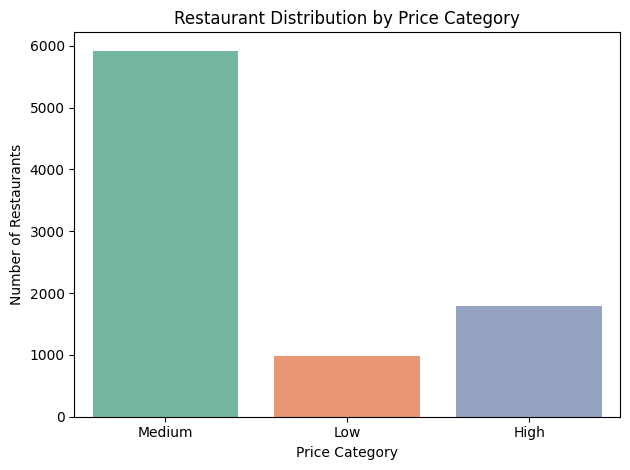

In [6]:
def price_bucket(x):
    if x < 200:
        return 'Low'
    elif x <= 400:
        return 'Medium'
    else:
        return 'High'

df['price_bucket'] = df['costForTwo'].apply(price_bucket)

sns.countplot(data=df, x='price_bucket', hue='price_bucket', palette='Set2', legend=False)
plt.title("Restaurant Distribution by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Restaurants")
plt.tight_layout()

# ✅ Save chart to images folder
plt.savefig("images/price_bucket_distribution.png", bbox_inches='tight')
plt.show()

In [7]:
df_exploded = df.copy()
df_exploded['cuisines'] = df_exploded['cuisines'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
df_exploded = df_exploded.explode('cuisines')

# Drop null ratings
df_exploded = df_exploded.dropna(subset=['avgRating'])

# Sort and get top-rated
top_rated = df_exploded.sort_values(by='avgRating', ascending=False)
top_by_cuisine_area = top_rated.groupby(['area', 'cuisines']).first().reset_index()

top_by_cuisine_area[['area', 'cuisines', 'name', 'avgRating']].head(10)

,area,cuisines,name,avgRating
0,26,BiryaniKeralaSouth IndianThalis,Malabar Point,4.2
1,3rd Block Jayanagar,Fast FoodChaatSnacksPizzasNorth IndianIndian,Hari Super Sandwich,4.0
2,A Unit of M/S Cohort Ruby Area,AsianIndianTandoorTibetanChinese,The Tasty Bites,4.2
3,A.S. Rao Nagar & Sainikpuri,IndianSouth Indian,SRI SAI AK TIFFIN CENTRE,4.2
4,Abids,BeveragesDesserts,SLAY Coffee,4.1
5,Abids,BiryaniHyderabadiDesserts,Gullu Dada's Biryani,3.8
6,Abids,BiryaniMughlaiLucknowiHyderabadiKebabsNorth In...,Behrouz Biryani,3.8
7,Abids,BiryaniNorth IndianChinese,The Biryani Life,4.0
8,Abids,ChineseIndianBeveragesSnacks,Lavish Corner,3.9
9,Abids,ComboSnacksBeveragesDesserts,Faasos,4.0


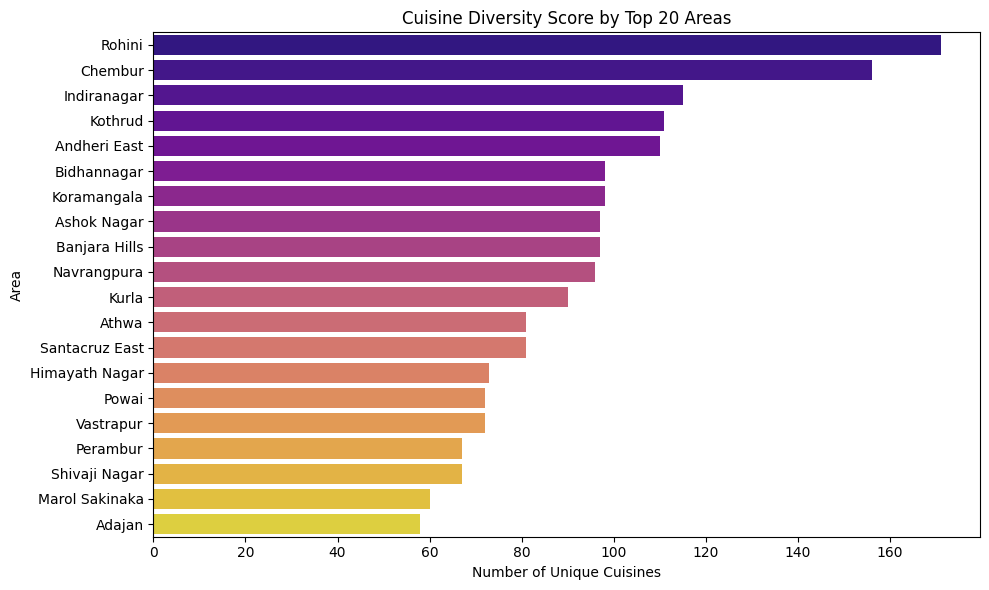

In [8]:
# Step 1: Check top 20 most frequent areas
top_areas = df['area'].value_counts().head(20).index

# Step 2: Filter only those
df_cleaned = df[df['area'].isin(top_areas)].copy()

# Step 3: Re-explode and re-run diversity plot
df_cleaned['cuisines'] = df_cleaned['cuisines'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
df_cleaned = df_cleaned.explode('cuisines')

cuisine_diversity = df_cleaned.groupby('area')['cuisines'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_diversity.values, y=cuisine_diversity.index, hue=cuisine_diversity.index, palette='plasma', legend=False)
plt.title("Cuisine Diversity Score by Top 20 Areas")
plt.xlabel("Number of Unique Cuisines")
plt.ylabel("Area")
plt.tight_layout()
plt.savefig("images/cuisine_diversity_by_area.png", bbox_inches='tight')
plt.show()

Correlation between rating and delivery time: -0.045


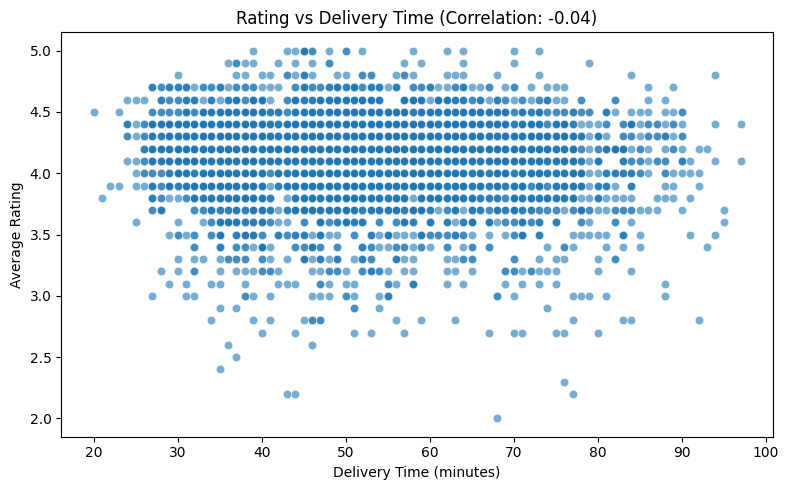

In [9]:
# Drop missing values
df_corr = df.dropna(subset=['avgRating', 'deliveryTime'])

# Correlation coefficient
correlation = df_corr['avgRating'].corr(df_corr['deliveryTime'])
print(f"Correlation between rating and delivery time: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corr, x='deliveryTime', y='avgRating', alpha=0.6)
plt.title(f"Rating vs Delivery Time (Correlation: {correlation:.2f})")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Average Rating")
plt.tight_layout()

# Save plot
plt.savefig("images/rating_vs_delivery_time.png", bbox_inches='tight')
plt.show()

In [10]:
# Define outliers: cost > 500, rating < 3.5, delivery > 50 mins
outliers = df[(df['costForTwo'] > 500) & ((df['avgRating'] < 3.5) | (df['deliveryTime'] > 50))]

outliers = outliers[['name', 'area', 'costForTwo', 'avgRating', 'deliveryTime']]
outliers = outliers.sort_values(by='costForTwo', ascending=False)

outliers.head(10)

,name,area,costForTwo,avgRating,deliveryTime
2611,Malgudi - The Savera Hotel,Mylapore,2500.0,4.1,62
1021,ITC Windsor - Gourmet Couch,Vasanth Nagar,2500.0,4.5,55
6106,Yauatcha,Bandra Area,2000.0,4.5,52
7414,CONRAD PUNE,Sangamvadi,2000.0,4.4,53
2153,Chin Chin - The Residency,T. Nagar,1900.0,4.3,72
6641,Sante Spa Cuisine,Bandra West,1900.0,NaN,58
6738,China House Restaurant by Grand Hyatt Mumbai,Santacruz East,1800.0,NaN,56
6220,Celini - Grand Hyatt Mumbai,Bandra Area,1800.0,NaN,61
2932,Dine House by Eleven Course,Sector 10 Rohini,1650.0,NaN,53
4458,MASHALLAH BAIT AL MANDI THE ARABIAN RESTAURANT,Charminar,1600.0,NaN,79


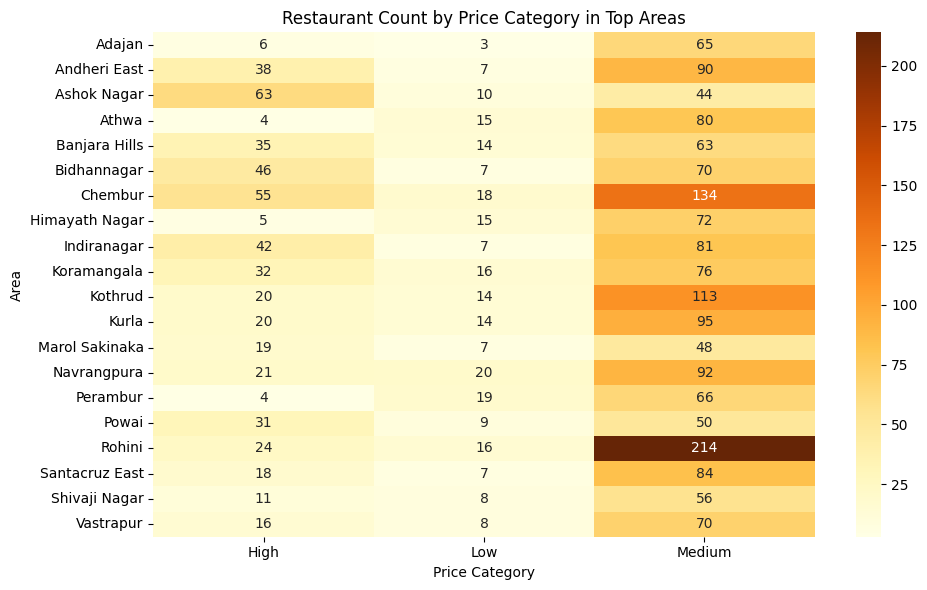

In [11]:
# Reuse cleaned area list
df_heatmap = df[df['area'].isin(top_areas)]

# Group by area and price bucket
area_price_count = df_heatmap.groupby(['area', 'price_bucket']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(area_price_count, annot=True, cmap='YlOrBr', fmt='g')
plt.title("Restaurant Count by Price Category in Top Areas")
plt.xlabel("Price Category")
plt.ylabel("Area")
plt.tight_layout()

plt.savefig("images/restaurant_price_heatmap.png", bbox_inches='tight')
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_score = df.dropna(subset=['avgRating', 'deliveryTime', 'costForTwo']).copy()

df_score[['rating_scaled', 'delivery_scaled', 'cost_scaled']] = scaler.fit_transform(
    df_score[['avgRating', 'deliveryTime', 'costForTwo']]
)

# Create Swiggy Score
df_score['swiggy_score'] = (df_score['rating_scaled'] * 0.5) + \
                           ((1 - df_score['delivery_scaled']) * 0.3) + \
                           ((1 - df_score['cost_scaled']) * 0.2)

# View Top Restaurants
top_swiggy = df_score.sort_values(by='swiggy_score', ascending=False)
top_swiggy[['name', 'area', 'avgRating', 'deliveryTime', 'costForTwo', 'swiggy_score']].head(10)

,name,area,avgRating,deliveryTime,costForTwo,swiggy_score
63,Natural Ice Cream,Navrangpura,4.8,30,150.0,0.915706
7146,Shree Krishna Juice Bar,Shivajinagar,5.0,39,150.0,0.913974
6718,Natural Ice Cream,Santacruz East,4.7,27,150.0,0.910727
8227,NIC Natural Ice Creams,Nanpura,4.7,28,120.0,0.909231
7109,Natural Ice Cream,Shivajinagar,4.7,28,150.0,0.906831
1925,The Brooklyn Creamery - Healthy Ice Cream,Periyamet,4.7,27,200.0,0.906727
5916,Apsara Ice Creams,Santacruz East,4.6,24,150.0,0.905749
7296,Cafe Chokolade,Modi Colony,4.7,30,120.0,0.901439
7185,Gulp,Shivajinagar,4.9,37,200.0,0.901100
3475,Scoops,Koti,4.5,20,200.0,0.900667


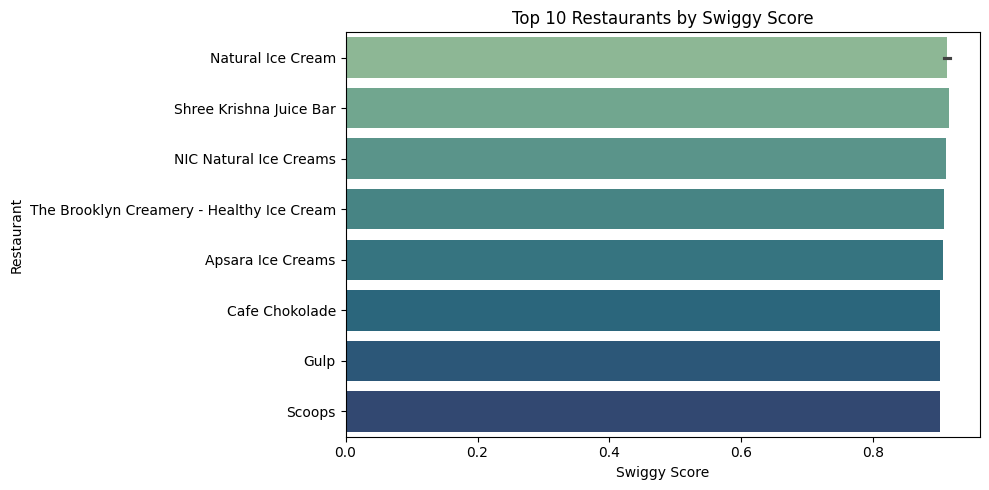

In [13]:
top_10 = top_swiggy[['name', 'swiggy_score']].head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10, x='swiggy_score', y='name', hue='name', palette='crest', legend=False)
plt.title("Top 10 Restaurants by Swiggy Score")
plt.xlabel("Swiggy Score")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.savefig("images/top_swiggy_score.png", bbox_inches='tight')
plt.show()